In [8]:
import geopandas as gpd
import osmnx as ox
import networkx as nx

In [2]:
#Read in the subgraphs
gdf_All = gpd.read_file('./Data/Subgraphs.shp')

In [5]:
#Subset a single subgraph
gdf_0 = gdf_All.loc[gdf_All.subgraph_i == 0]

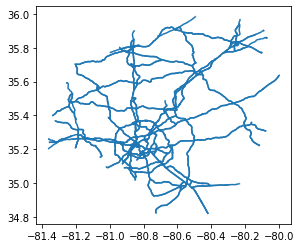

In [7]:
gdf_0.geometry.plot();

In [17]:
#Reproject and dissolve roads into a single feature
roads = gdf_0.geometry.to_crs(32617).unary_union

In [22]:
ends = roads.interpolate(1,True)

In [30]:
end_points = []
for g in roads.geoms:
    end_points.append(g.interpolate(1,True))

In [33]:
gdfX = gpd.GeoSeries(end_points)

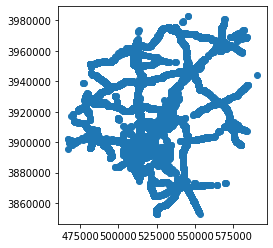

In [35]:
gdfX.plot()

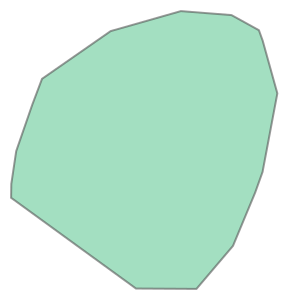

In [16]:
#Retract the convex hull 10 meters
roads.convex_hull.buffer(-10)